# Problem Statement:

### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Downlaod Files:

* https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [72]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#Importing zscore
from scipy.stats import zscore

#Importing preprocessing libraries
from sklearn.preprocessing import power_transform, LabelEncoder, StandardScaler

#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import Library to Balance Dataset.
from imblearn.over_sampling import SMOTE

#Import PCA
from sklearn.decomposition import PCA

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

#Importing GridSearchCV to Tune model.
from sklearn.model_selection import GridSearchCV

#Import pickle
import pickle

In [2]:
#Read Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#Checking rows and columns
df.shape

(1000, 40)

* Dataset has 1000 rows and 40 columns.

In [4]:
#Checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

* We have 19 numerical and 21 object columns.

In [5]:
#Checking null values of the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

* We have all null values in column _c39, henece will remove this column.

In [6]:
#Dropping _c39 column
df.drop('_c39', axis = 1, inplace = True)

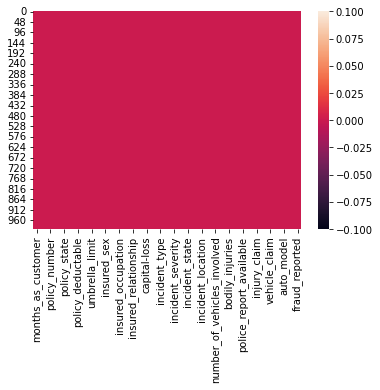

In [7]:
#Checking null values again
sns.heatmap(df.isnull())
plt.show()

* No more null values present in the dataset.

# Exploratory Data Analysis

In [8]:
#Data type and their unique values
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts())
        print('***************************************************************************************')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
***************************************************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
***************************************************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
***************************************************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
***************************************************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
*******************************************

In [9]:
#Replacing '?' with No info
df = df.replace('?', 'No Info')

In [10]:
#Seperating categroical and continuous features
cat_features = [col for col in df.columns if df[col].dtypes == 'object']
con_features = [col for col in df.columns if df[col].dtypes != 'object']

In [11]:
print('Number of object features are: ', len(cat_features))
print('Number of continuous features are: ', len(con_features))

Number of object features are:  21
Number of continuous features are:  18


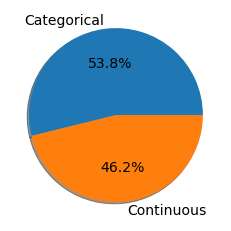

In [12]:
#Visualizing the percentage of categorical and continuous features
plt.pie([len(cat_features), len(con_features)], labels = ['Categorical', 'Continuous'], textprops = {'fontsize':14}, autopct = '%1.1f%%', shadow = True)
plt.show()

* We have 53.8% Categorical and 46.2% Continuous features.

In [13]:
#Checking statisital information of the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [14]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

* We can see there is one row in negative value will drop that.

In [15]:
#Locating row with negative value for column umbrella limit
df.loc[df['umbrella_limit'] == -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,29-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [16]:
#Droping row with negative value
df.drop(df[df['umbrella_limit'] == -1000000].index, inplace = True)

In [17]:
#Dividing incident date into date month and year
df['incident_Date'] = df['incident_date'].str.split('-').str[0]
df['incident_Month'] = df['incident_date'].str.split('-').str[1]
df['incident_Year'] = df['incident_date'].str.split('-').str[2]

In [18]:
#Checking values of incident year
df['incident_Year'].value_counts()

2015    999
Name: incident_Year, dtype: int64

In [19]:
# In incident year all the incidents has happend in the year of 2015 so droping incident year
df.drop('incident_Year', axis = 1, inplace = True)

In [20]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02


In [21]:
#Droping column incident_date
df.drop('incident_date', axis = 1, inplace = True)

In [22]:
#Deviding policy_bind_date into date, month and year
df['policy_bind_Date'] = df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month'] = df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year'] = df['policy_bind_date'].str.split('-').str[2]

In [23]:
#Droping column policy_bind_date
df.drop('policy_bind_date', axis = 1, inplace = True)

In [24]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [25]:
#Droping unnecessary columns
df.drop(['policy_number', 'insured_zip', 'incident_location'], axis = 1, inplace = True)

In [26]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [27]:
#Checking value counts of target column Fraud reported 
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

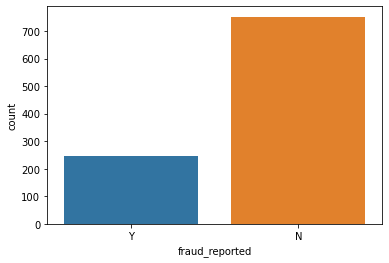

In [28]:
#Counts of fraud reported
sns.countplot(df['fraud_reported'])
plt.show()

* We have around 800 data out of which only 250 frauds were reported.
* Dataset is surely imbalanced will balance it in later process.

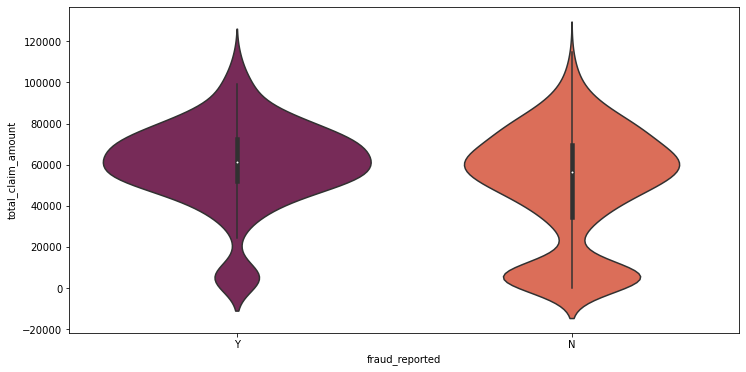

In [29]:
#Visualizing fraud reported by total claimed amount
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'total_claim_amount', data = df, palette = 'rocket')
plt.show()

* Most of the fraud reported found where total claimed amount was 50000 to 70000.

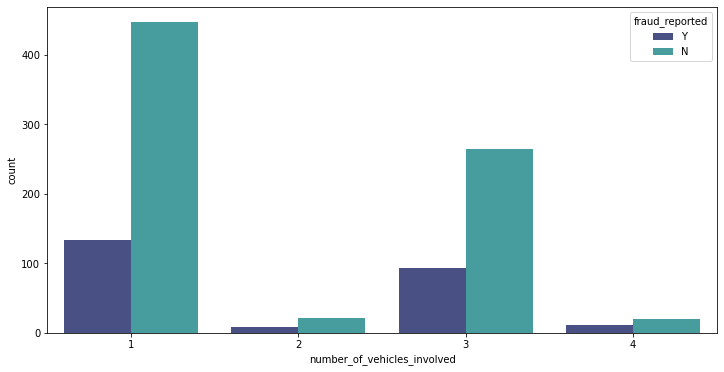

In [30]:
#Visualizing fraud reported by number of vehicles involved
plt.figure(figsize = (12,6))
sns.countplot('number_of_vehicles_involved', hue = 'fraud_reported', data = df, palette = 'mako')
plt.show()

* Most of the fraud were found where number_of_vehicles_involved more than 1.

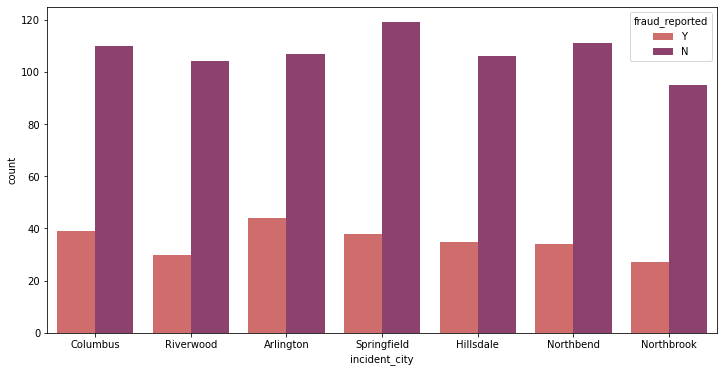

In [31]:
#Visualizing incident_city by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('incident_city', hue = 'fraud_reported', data = df, palette = 'flare')
plt.show()

* Highest fraud reported in Springfeild city followed by Northbend and Colombus.

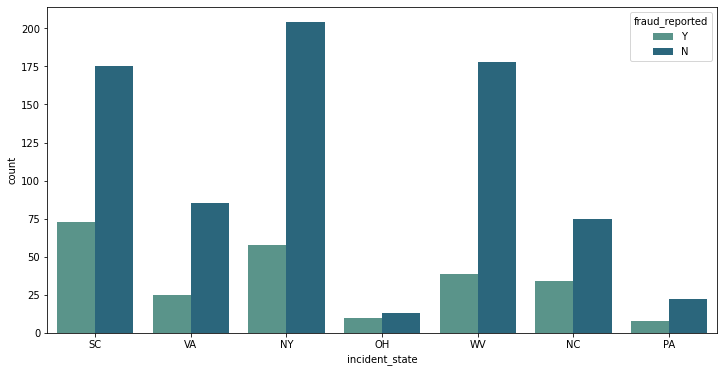

In [32]:
#Visualizing incident_state by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('incident_state', hue = 'fraud_reported', data = df, palette = 'crest')
plt.show()

* Most of the fraud reported were found where incident state was SC, NY and WV.

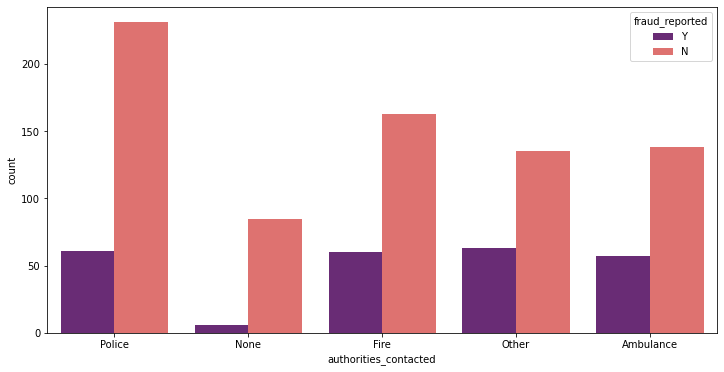

In [33]:
#Visualizing authorities_contacted by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('authorities_contacted', hue = 'fraud_reported', data = df, palette = 'magma')
plt.show()

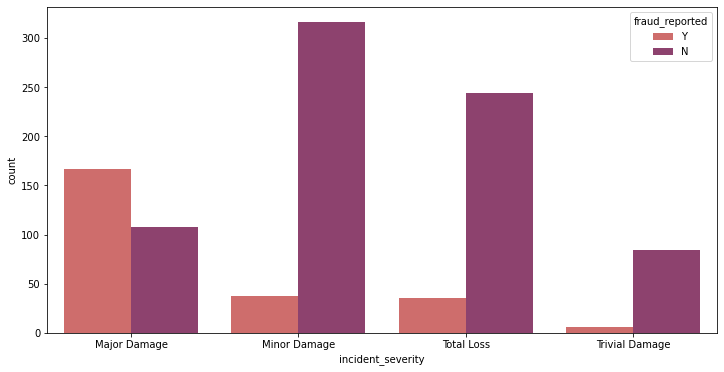

In [34]:
#Visualizing incident_severity by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('incident_severity', hue = 'fraud_reported', data = df, palette = 'flare')
plt.show()

* Most of the fraud reported claimed are Major damage.

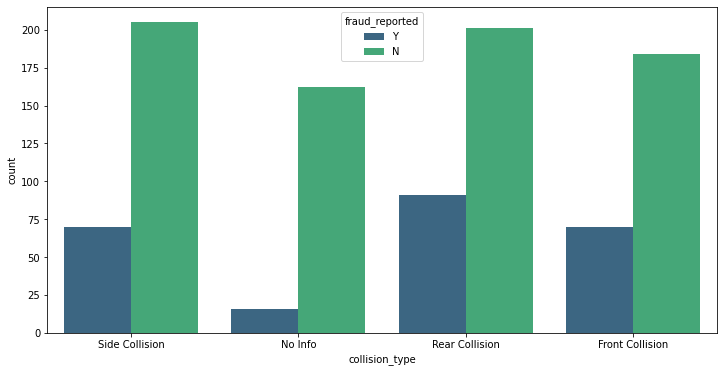

In [35]:
#Visualizing collision_type by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('collision_type', hue = 'fraud_reported', data = df, palette = 'viridis')
plt.show()

* Most of fraud reported claims in Side Collision, Rear Collision and Front Collision.

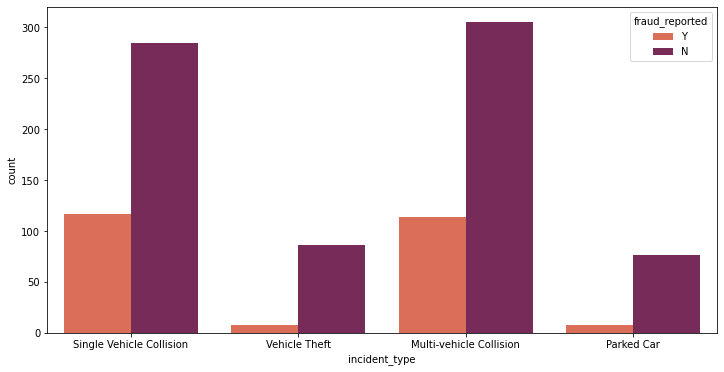

In [36]:
#Visualizing incident_type by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('incident_type', hue = 'fraud_reported', data = df, palette = 'rocket_r')
plt.show()

* We have most claim reported and fraud reported in single vehicle collision and multi vehicle collision incident type.

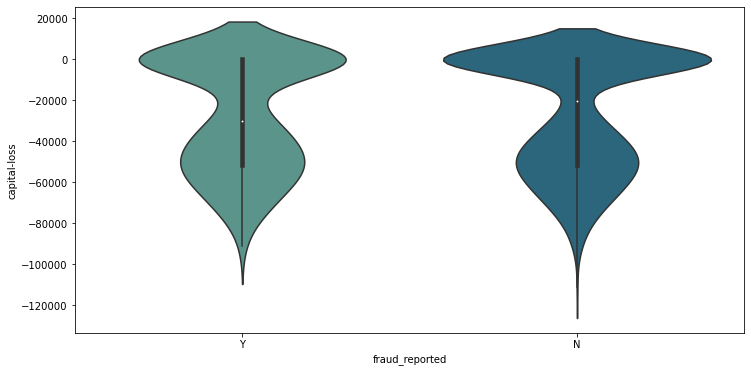

In [37]:
#Visualizing fraud reported by capital loss
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'capital-loss', data = df, palette = 'crest')
plt.show()

* Most of the fraud reported for the cx where capital loss are -40000 to -60000.

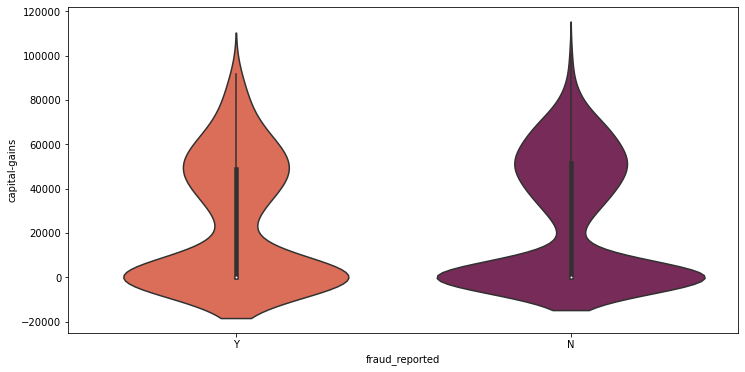

In [38]:
#Visualizing fraud reported by capital gains
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'capital-gains', data = df, palette = 'rocket_r')
plt.show()

* Most of fraud reported are in cx where capital gains are 0 to 50000.

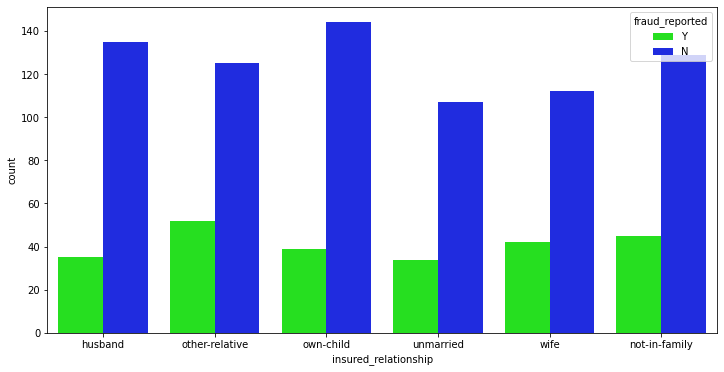

In [39]:
#Visualizing insured_relationship by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('insured_relationship', hue = 'fraud_reported', data = df, palette = 'hsv')
plt.show()

* As per the sbove plot cx who is having insured relationship with other_relative and wife are the most reported than others.

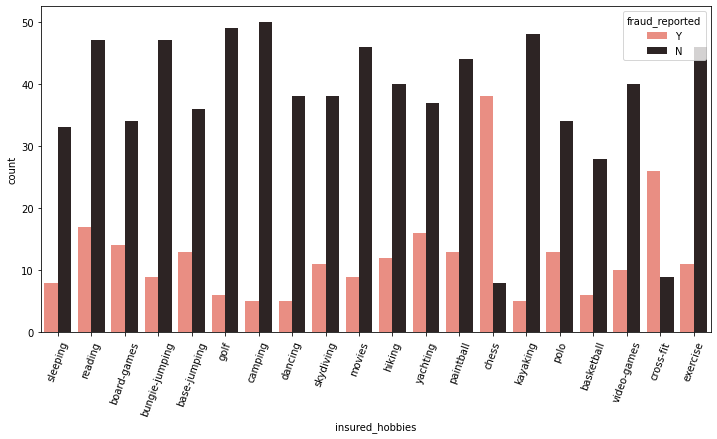

In [40]:
#Visualizing insured_hobbies by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('insured_hobbies', hue = 'fraud_reported', data = df, palette = 'dark:salmon_r')
plt.xticks(rotation = 70)
plt.show()

* Here we can see that for the customer with hobbies Chess are most reported fraud followed by cross fit.

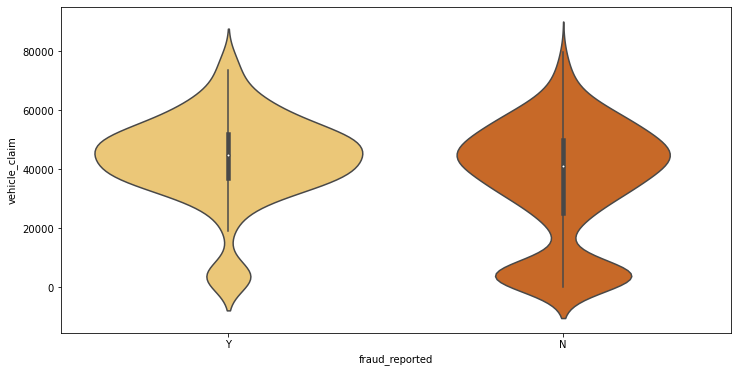

In [41]:
#Visualizing fraud reported by vehicle claim
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'vehicle_claim', data = df, palette = 'YlOrBr')
plt.show()

* In Vehicle claim most of the cx are between 100 to 6500 and fraud report is higher in cx between 3500 to 5500 vehicle_claim.

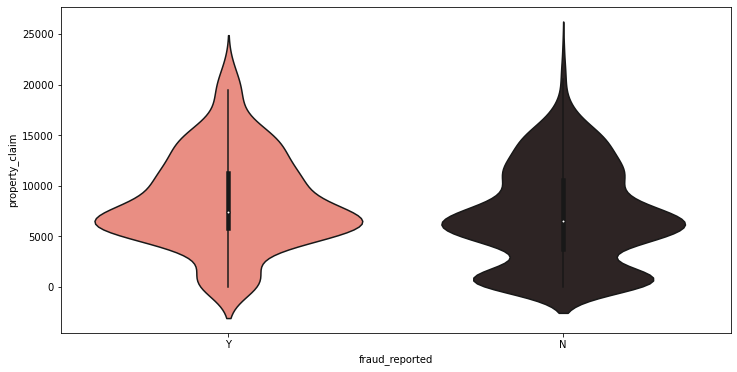

In [42]:
#Visualizing fraud reported by property claim
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'property_claim', data = df, palette = 'dark:salmon_r')
plt.show()

* For property claim fraud reported is higher in cx claimed of 5000 to 8000.

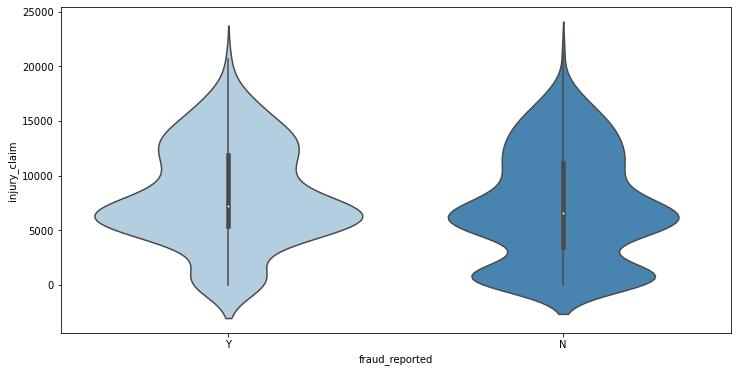

In [43]:
#Visualizing fraud reported by injury claim
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'injury_claim', data = df, palette = 'Blues')
plt.show()

* Most of the cx injury claim is between 100 to 15000 and most fraud reported cx are between 5000 to 8000 injury claim.

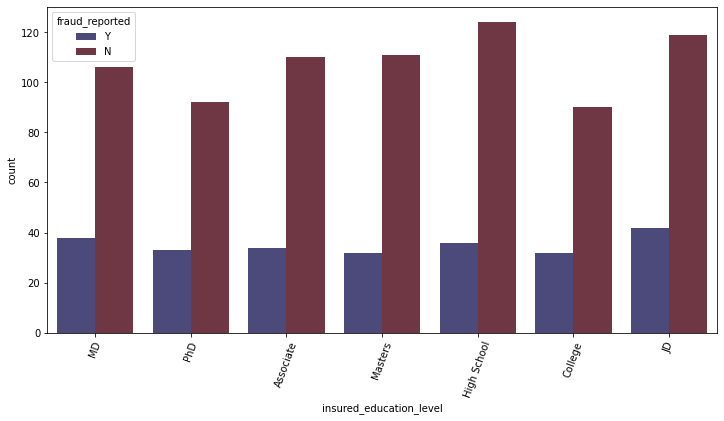

In [44]:
#Visualizing insured_education_level by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('insured_education_level', hue = 'fraud_reported', data = df, palette = 'icefire')
plt.xticks(rotation = 70)
plt.show()

* Fraud reported are almost same of all the cx with different education levels.

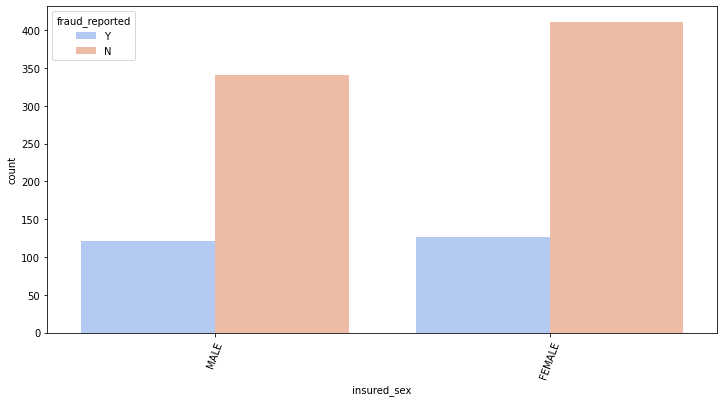

In [45]:
#Visualizing insured_sex by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('insured_sex', hue = 'fraud_reported', data = df, palette = 'coolwarm')
plt.xticks(rotation = 70)
plt.show()

* We have female data more than male but fraud reported numbers are little higher for male than female.

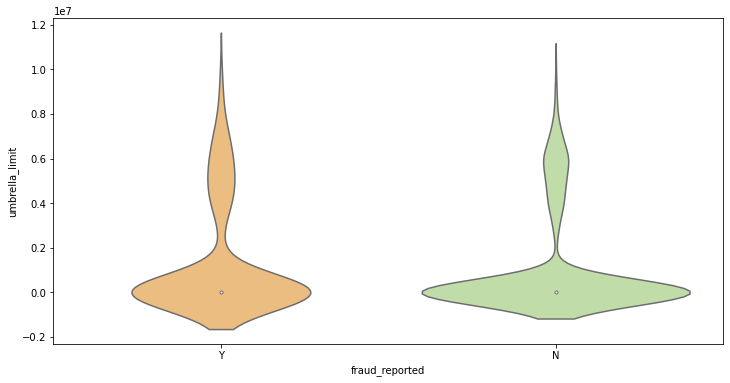

In [46]:
#Visualizing fraud reported by umbrella limit
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'umbrella_limit', data = df, palette = 'Spectral')
plt.show()

* Most of the frauds were reported by cx with umbrella limit 0.

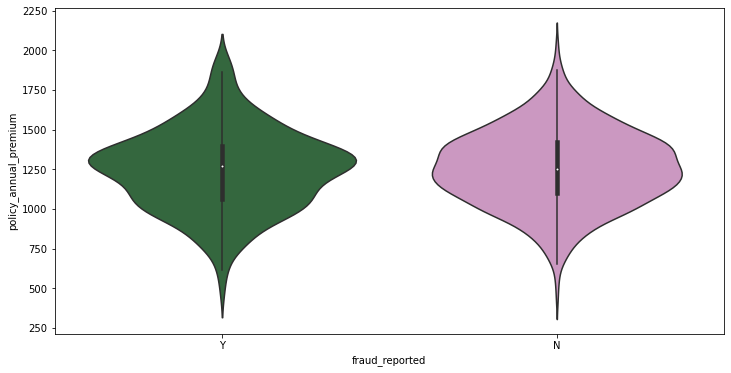

In [47]:
#Visualizing fraud reported by policy_annual_primium
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'policy_annual_premium', data = df, palette = 'cubehelix')
plt.show()

* Most of the cx have premium amount between 1000 to 1500.
* Most of the frauds were reported by the customers with premium amount between 1250 to 1300.

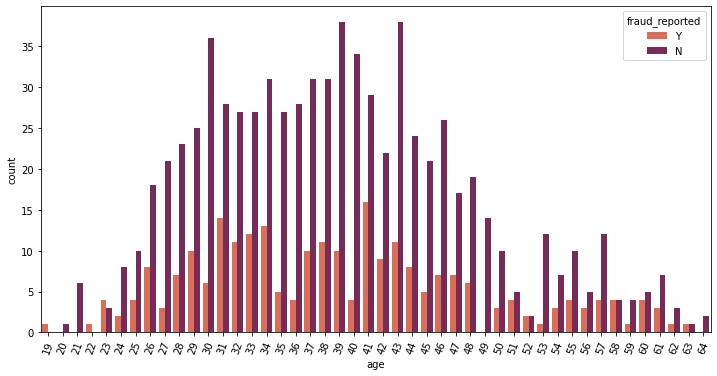

In [48]:
#Visualizing age by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('age', hue = 'fraud_reported', data = df, palette = 'rocket_r')
plt.xticks(rotation = 70)
plt.show()

* We can see that the most of customers are aged between 26 to 50.
* Most of the frauds were reported by the customers with age between 26 to 50 years.

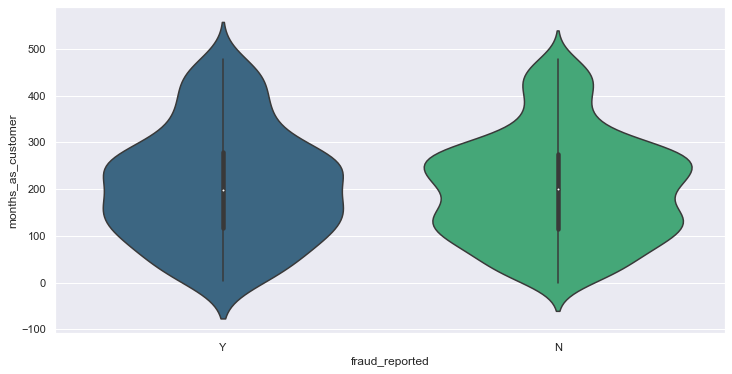

In [49]:
#Visualizing months_as_customer by fraud_reported
plt.figure(figsize = (12,6))
sns.set(color_codes = True)
sns.violinplot('fraud_reported', 'months_as_customer', data = df, palette = 'viridis')
plt.show()

* Most of the cx are 100 to 300 months old as customer.
* Fraud report is high in cx between 100 to 250 months old.

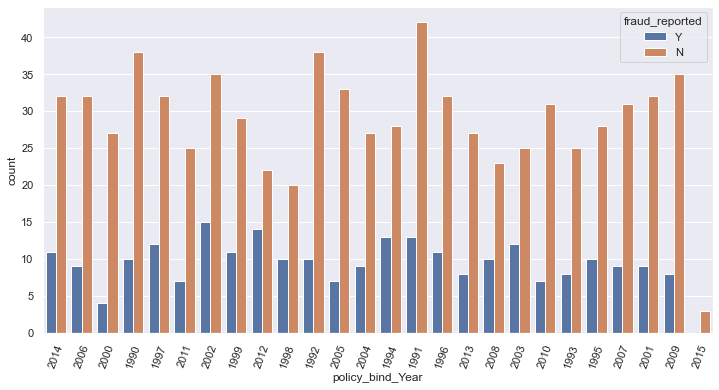

In [50]:
#Visualizing policy_bind_year by fraud_reported
plt.figure(figsize = (12,6))
sns.countplot('policy_bind_Year', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 70)
plt.show()

* Fraud report is high for the policy bind year 2002, 2012, 1994, 1991, 2003 and 2014.

# Correlation

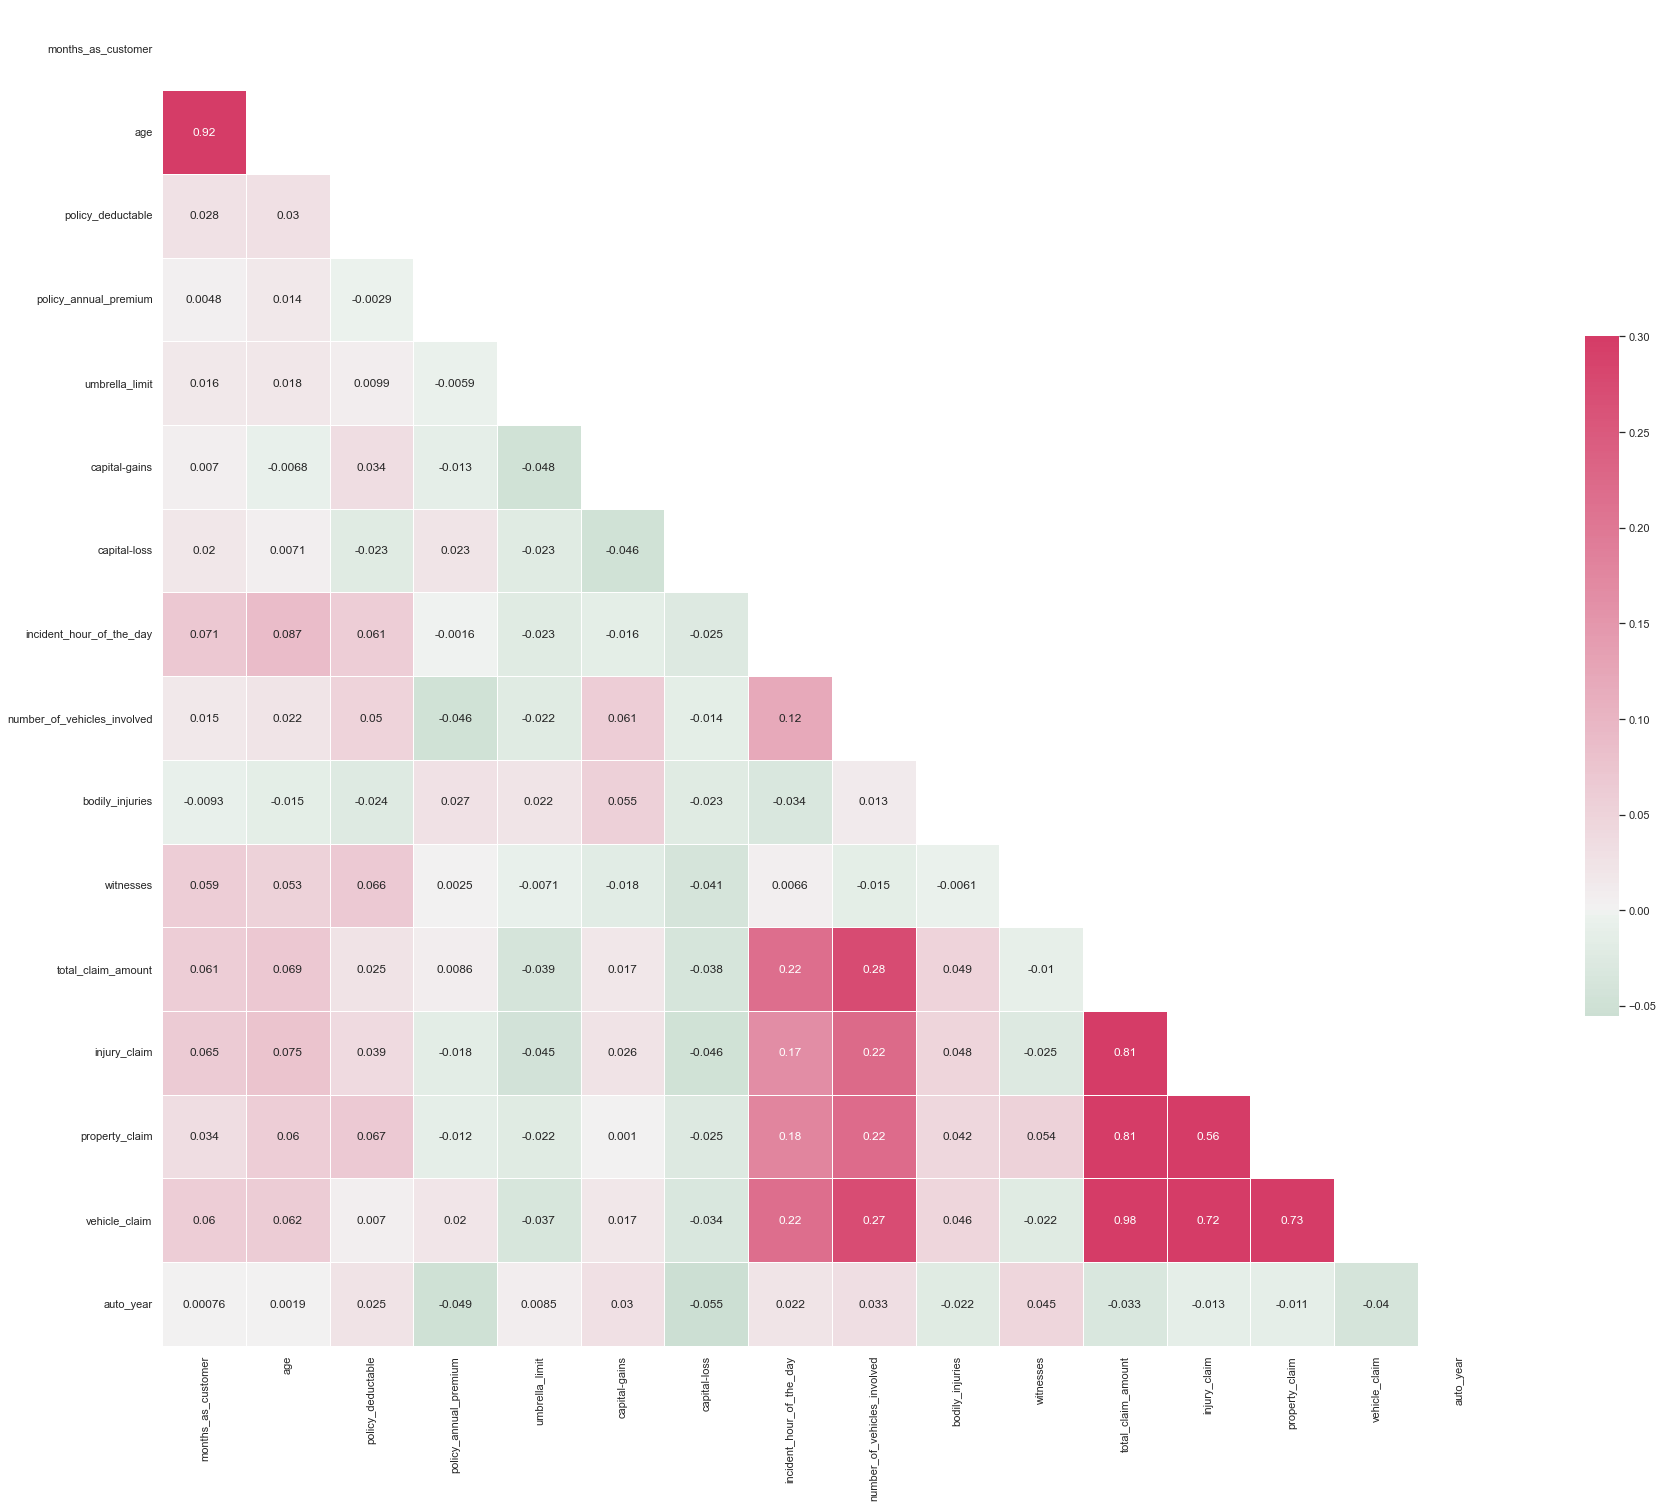

In [51]:
#Checking feature correlation using heatmap
sns.set_theme(style = 'white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (30,25))
cmap = sns.diverging_palette(500,1, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True)

plt.show()

# Skewness Handling

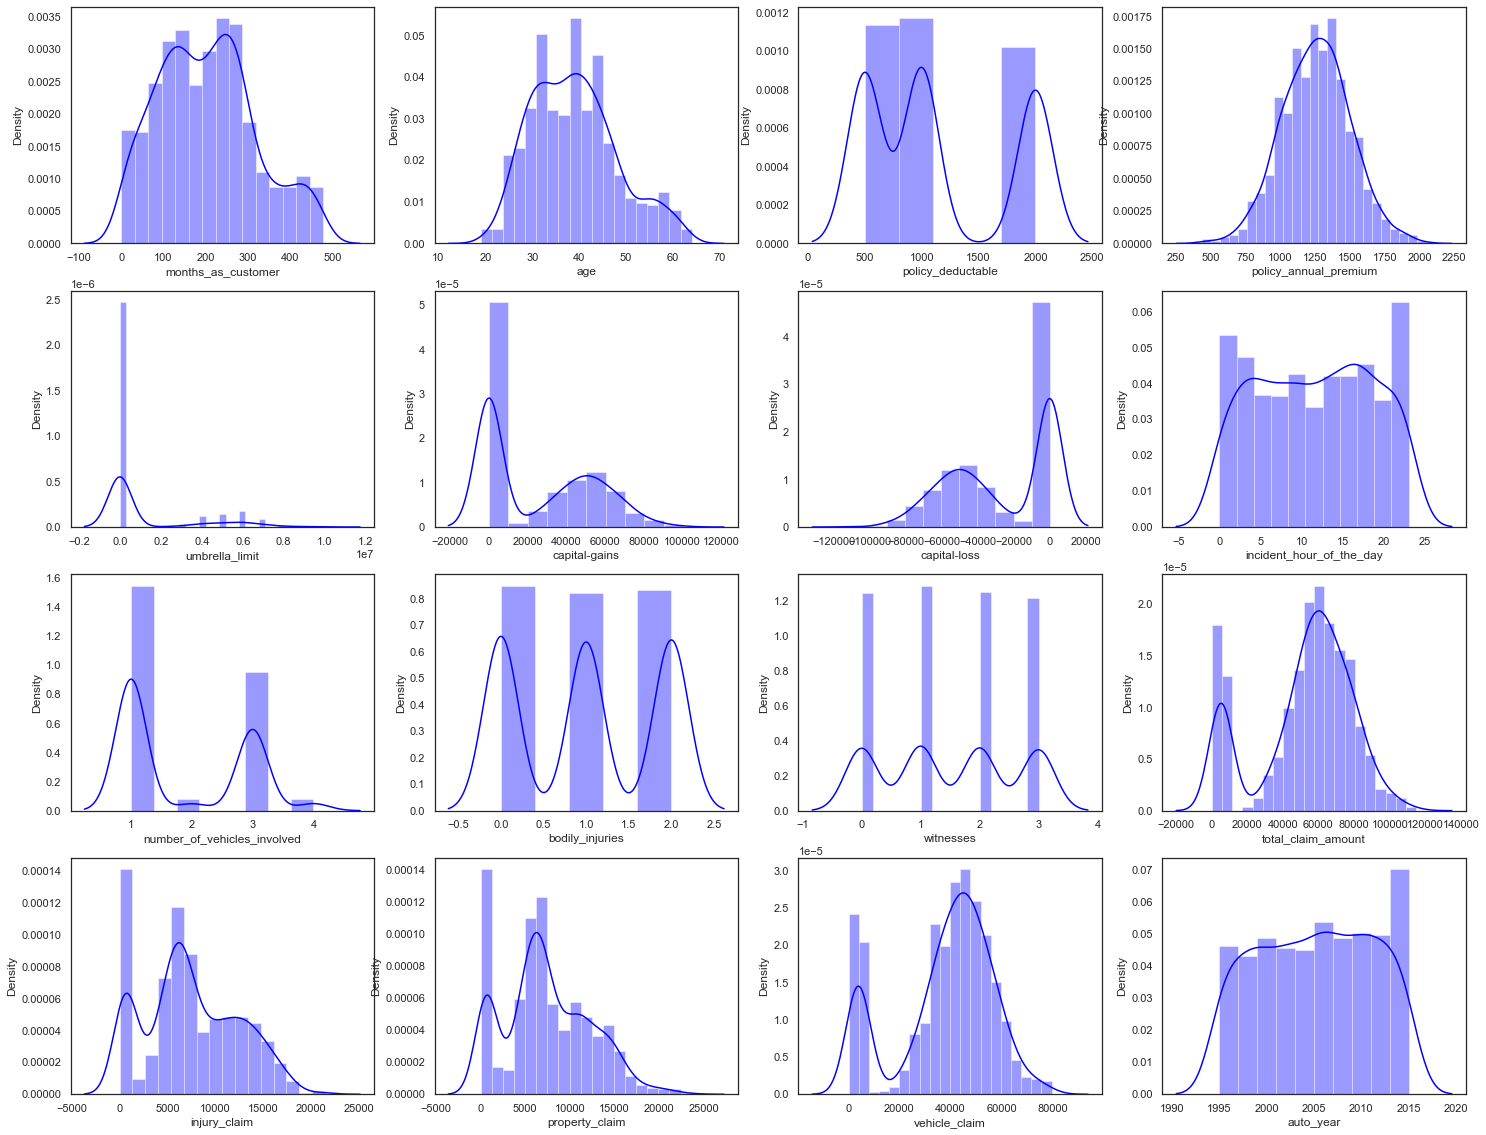

In [52]:
# Checking distribution of the dataset.
plt.figure(figsize = (25,20))
for i in enumerate(df.select_dtypes(include = ['int64', 'int32', 'float'])):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(df[i[1]], color = 'blue')
    
plt.show()

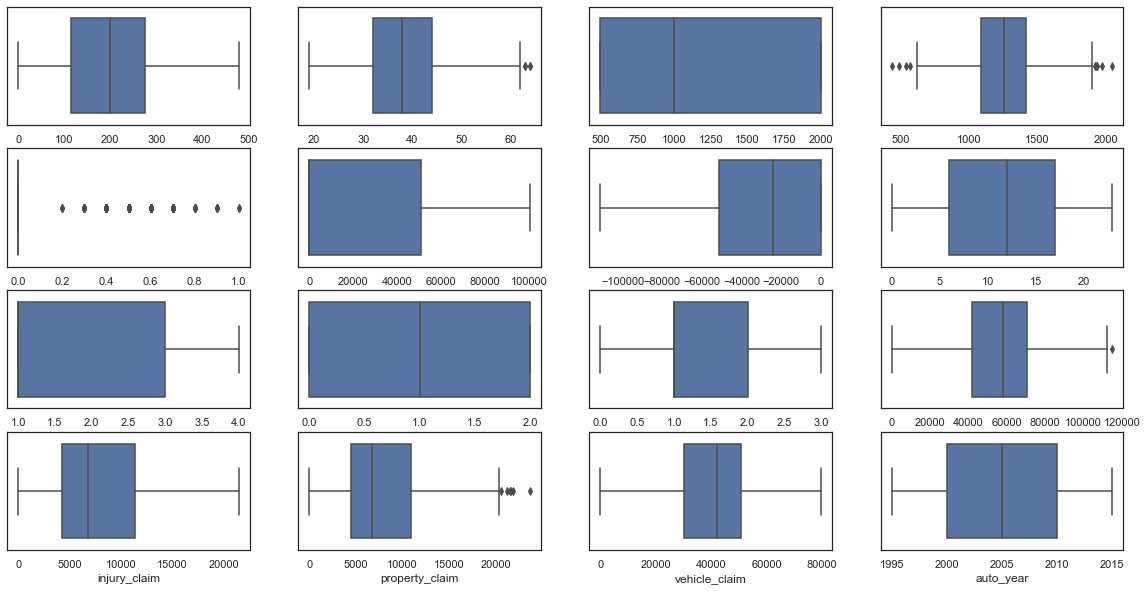

In [53]:
#Checking outliers
plt.figure(figsize = (20,10))
for i in enumerate(df.select_dtypes(include = ['int64', 'int32', 'float'])):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(df[i[1]])
    
plt.show()

In [54]:
#Checking skewness of the dataset
df.skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
incident_Date                  0.040471
incident_Month                 0.265608
policy_bind_Date               0.051641
policy_bind_Month             -0.018242
policy_bind_Year               0.050574
dtype: float64

In [55]:
#Using power transform to handle skewness
df[['umbrella_limit', 'total_claim_amount', 'vehicle_claim']] = power_transform(
df[['umbrella_limit', 'total_claim_amount', 'vehicle_claim']], method = 'yeo-johnson')

In [56]:
df.skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.492893
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.511002
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.523647
auto_year                     -0.049502
incident_Date                  0.040471
incident_Month                 0.265608
policy_bind_Date               0.051641
policy_bind_Month             -0.018242
policy_bind_Year               0.050574
dtype: float64

In [57]:
#Chcking where data are >3
z = np.abs(zscore(df.select_dtypes(include = ['int32', 'int64', 'float'])))
print(np.where(z > 3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [58]:
#removing ouliers using zscore
new_df = df[(z < 3).all(axis = 1)]

In [59]:
df.shape

(999, 39)

In [60]:
#Checking rows and columns after using z score
new_df.shape

(994, 39)

In [61]:
#Printing data loss after removing skewness
data_loss = (999 - 979)/999 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  2.002002002002002


* 2% data has been removed while removing outliers using Z score method.

In [62]:
new_df.skew()

months_as_customer             0.360794
age                            0.474776
policy_deductable              0.474379
policy_annual_premium          0.034076
umbrella_limit                 1.485060
capital-gains                  0.477833
capital-loss                  -0.378032
incident_hour_of_the_day      -0.039644
number_of_vehicles_involved    0.501381
bodily_injuries                0.011134
witnesses                      0.026138
total_claim_amount            -0.507917
injury_claim                   0.270831
property_claim                 0.359270
vehicle_claim                 -0.520408
auto_year                     -0.050974
incident_Date                  0.038275
incident_Month                 0.260740
policy_bind_Date               0.057174
policy_bind_Month             -0.022152
policy_bind_Year               0.058562
dtype: float64

In [63]:
df = new_df

# Encoding

In [64]:
#Using Label Encoder to convert categorical columns to numerical
lab_enc = LabelEncoder()
categ_data = df.select_dtypes(exclude = ['int64', 'float','int32'])
for val in categ_data:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

* All columns are now converted into numerical values.

# Spliting dataset into X and Y variable

In [66]:
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [67]:
x.shape

(994, 38)

In [68]:
y.shape

(994,)

# Scaling X data

In [69]:
#Scaling data using standrd scaler
sc = StandardScaler()
scaled = sc.fit_transform(x)

In [70]:
scaled

array([[ 1.07439757,  0.98648232,  1.18695226, ...,  0.17936788,
         0.97919244,  1.68577938],
       [ 0.20522594,  0.33036762, -0.01695646, ...,  1.3164321 ,
        -0.16353405,  0.59953697],
       [-0.6117954 , -1.09121425,  1.18695226, ..., -1.07140276,
         0.69351082, -0.21514484],
       ...,
       [-0.64656226, -0.54445199,  1.18695226, ...,  0.17936788,
        -1.30626053,  0.19219606],
       [ 2.20432069,  2.51741664, -1.22086518, ...,  0.2930743 ,
         1.26487406,  1.27843848],
       [ 2.18693726,  2.29871174,  1.18695226, ..., -0.50287065,
         1.26487406, -0.75826605]])

# Checking multicollinearity problem using VIF

In [73]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

#Let's check values
vif

,vif,features
0,6.865096,months_as_customer
1,6.863021,age
2,1.032585,policy_state
3,1.030422,policy_csl
4,1.044438,policy_deductable
5,1.034761,policy_annual_premium
6,1.039393,umbrella_limit
7,1.032625,insured_sex
8,1.053813,insured_education_level
9,1.018904,insured_occupation


* For many columns VIF value is showing more than 5 will remove total_claim_amount first and will check VIF score again

In [74]:
#Droping Total total claim amount column
x = x.drop(columns = ['total_claim_amount'])

#Scaling x data after removing column ER
scaled = sc.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,6.863450,months_as_customer
1,6.863020,age
2,1.032565,policy_state
3,1.029084,policy_csl
4,1.043184,policy_deductable
5,1.034233,policy_annual_premium
6,1.039392,umbrella_limit
7,1.029050,insured_sex
8,1.053788,insured_education_level
9,1.018180,insured_occupation


* Still for few features VIF value is more than 5 will remove age column and check VIF again.

In [75]:
#Droping age column
x = x.drop(columns = ['age'])

#Scaling x data after removing column ER
scaled = sc.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.056538,months_as_customer
1,1.031486,policy_state
2,1.028453,policy_csl
3,1.043182,policy_deductable
4,1.033190,policy_annual_premium
5,1.039138,umbrella_limit
6,1.026882,insured_sex
7,1.053708,insured_education_level
8,1.017659,insured_occupation
9,1.048997,insured_hobbies


* Multicollinearity problem has resolved.

# Balance Dataset

In [76]:
smt = SMOTE()
x,y = smt.fit_resample(x, y)

In [77]:
x.shape

(1496, 36)

In [78]:
y.shape

(1496,)

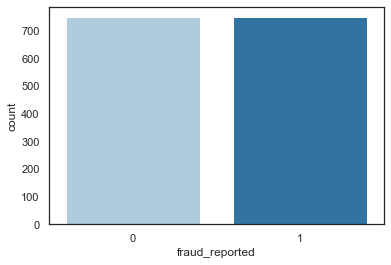

In [79]:
#Visualizing balanced dataset
sns.countplot(y, palette = 'Paired')
plt.show()

* Now dataset have been balanced.

# Model Building

In [82]:
#Find best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6166666666666667 on Random State = 29


In [83]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 29)

In [84]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [85]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 61.66666666666667
Confusion Matrix of  LogisticRegression()  is 
 [[95 53]
 [62 90]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       148
           1       0.63      0.59      0.61       152

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300

**************************************************
Accuracy_Score of  RidgeClassifier() is 80.0
Confusion Matrix of  RidgeClassifier()  is 
 [[111  37]
 [ 23 129]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       148
           1       0.78      0.85      0.81       152

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

**************************************************
Acc

In [86]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 61.66666666666667
cross Validation accuracy score of  LogisticRegression()  is  54.81204013377926
**************************************************
Accuracy_Score of  RidgeClassifier() is 80.0
cross Validation accuracy score of  RidgeClassifier()  is  79.01939799331103
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 79.66666666666666
cross Validation accuracy score of  DecisionTreeClassifier()  is  80.62564102564103
**************************************************
Accuracy_Score of  SVC() is 59.333333333333336
cross Validation accuracy score of  SVC()  is  56.0149386845039
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 69.66666666666667
cross Validation accuracy score of  KNeighborsClassifier()  is  68.98327759197325
**************************************************
Accuracy_Score of  RandomForestClassifier() is 86.33333333333333
cross Valida

* For Random Forest Classifier difference of accuracy and cross validation is the least compared to other models. We can say that Random Forest has given the best performance so far.

# Next will check ROC AUC curve for the fitted model

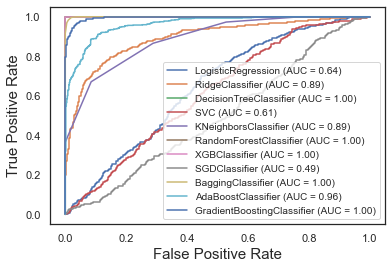

In [88]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(LR_model,x_train,y_train)

plot_roc_curve(RD_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(DT_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SV_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(KNR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(RFR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(XGB_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SGH_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(Bag_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(ADA_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(GB_model, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size': 10}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

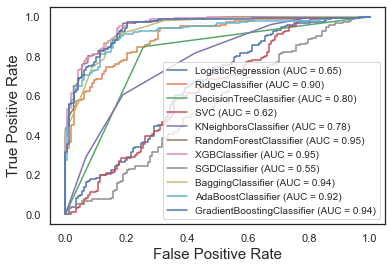

In [89]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(LR_model, x_test, y_test)

plot_roc_curve(RD_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(DT_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SV_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(KNR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(RFR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(XGB_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SGH_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(Bag_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(ADA_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(GB_model, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 10}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

* As per ROC AUC curve Random forest is the best model for our dataset.

# Hyper Tuning Random Forest Classifier

In [105]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[8,12,13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15,18,25,28,30],
    'min_samples_leaf':[3,5,6,8,10,12,15],
    'min_samples_split':[3,5,10,11,13,15],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 13}


In [106]:
Tuned_RFR_model = grd.best_estimator_
Tuned_RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=13)

In [107]:
#Model Confidence/Accuracy
print('Accuracy_Score of Tuned Random Forest Model is', accuracy_score(y_test,Tuned_RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Tuned Random Forest model is ",cross_val_score(Tuned_RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() * 100)

Accuracy_Score of Tuned Random Forest Model is 86.66666666666667
Cross Validation accuracy score of Tuned Random Forest model is  84.43389074693422


* I will save the original model as tuned model accuracy is not satisfactory.

In [108]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('Fraud_model', 'wb'))

In [109]:
#Loading saved model
loaded_model = pickle.load(open('Fraud_model','rb'))

In [110]:
fraud = loaded_model.predict(x_test)
fraud

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [111]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
Fraud = pd.DataFrame({'Actual Fraud Reported': y_test, 'Predicted Fraud Reported': fraud})
Fraud.head()

,Actual Fraud Reported,Predicted Fraud Reported
441,0,0
900,0,1
1425,1,1
74,0,0
961,1,1


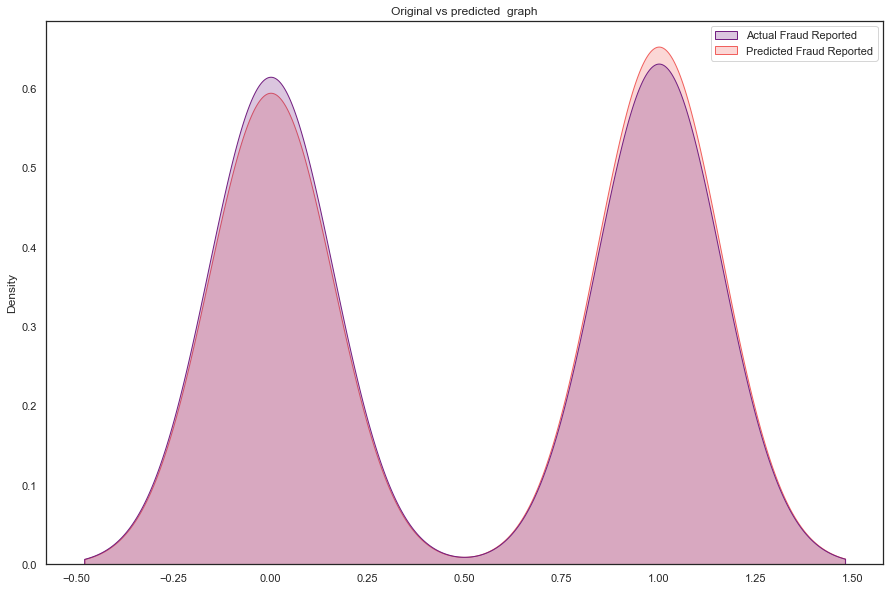

In [113]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = Fraud, palette = 'magma', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()